# Parsing _Hinode_/EIS Response Functions
Parse instrument files in the `ForwardModel` module.

In [63]:
import os
import sys
import glob

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import astropy.units as u

sns.set_context(context='notebook',font_scale=1.25)
%matplotlib inline

Get all of the filenames

In [4]:
file_template = os.path.join('/home/wtb2/Documents/Forward_Model/instruments/Hinode_EIS/EIS_*_*.*.ins')
eis_instr_files = glob.glob(file_template)

Parse the filenames to get the metadata and then pull out the response functions themselves.

In [66]:
eis_instr_info = []
for eif in eis_instr_files:
    #channel meta info
    eis_file = eif.split('/')[-1].split('_')[1:]
    el_ion = eis_file[0]
    transition = float('.'.join(eis_file[1].split('.')[:-1]))
    #read file
    with open(eif,'r') as f:
        lines = f.readlines()
    num_lines = int(lines[0])
    wavelength,response = np.empty(num_lines),np.empty(num_lines)
    for i in range(1,num_lines+1):
        wavelength[i-1],response[i-1] = list(filter(None,lines[i].split(' ')))
    #save to structure
    eis_instr_info.append({'element':el_ion[:2],'ion':el_ion[2:],'transition':transition,
                           'wavelength':wavelength,'response':response})

Now plot all of the response functions.

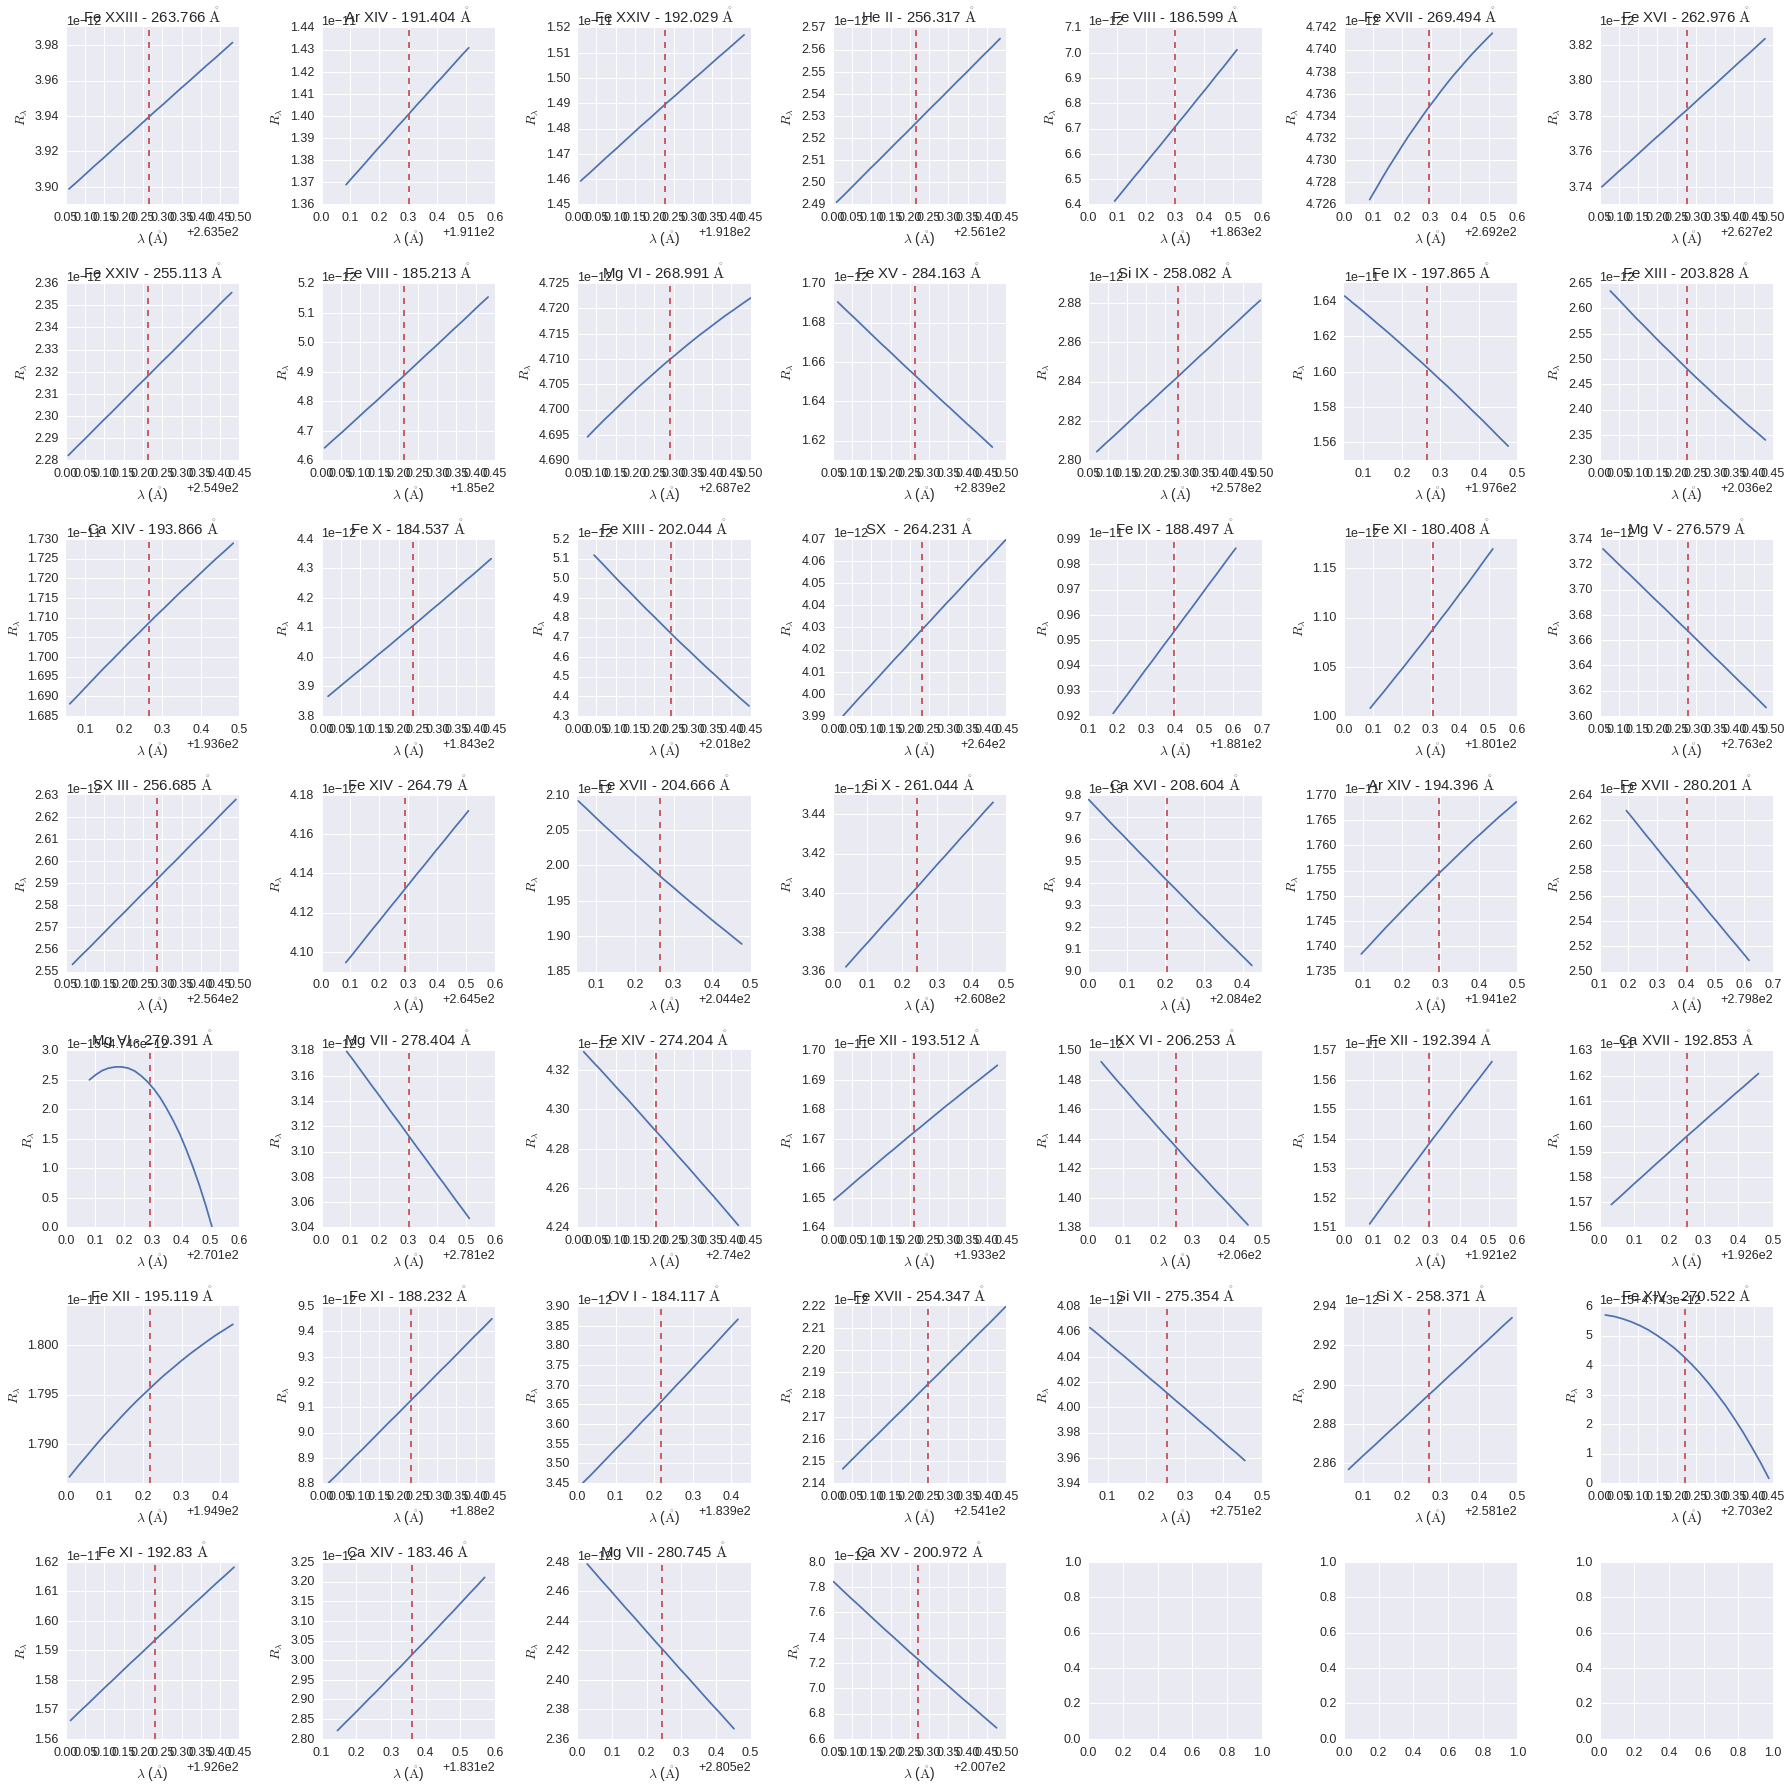

In [74]:
fig,axes = plt.subplots(7,7,figsize=(25,25))
for eis,ax in zip(eis_instr_info,axes.flatten()):
    ax.plot(eis['wavelength'],eis['response'])
    ax.axvline(x=eis['transition'],color=sns.color_palette('deep')[2],linestyle='dashed')
    ax.set_xlabel(r'$\lambda$ ($\mathrm{\mathring{A}}$)')
    ax.set_ylabel(r'$R_{\lambda}$')
    ax.set_title(r'{el} {ion} - {wave} $\mathrm{{\mathring{{A}}}}$'.format(el=eis['element'],
                                                                           ion=eis['ion'],
                                                                           wave=eis['transition']))
plt.tight_layout()

What about the responses for the two channels, 170-210 $\mathrm{\mathring{A}}$ and 250-290 $\mathrm{\mathring{A}}$?

In [75]:
eis_170_210 = []
with open('/home/wtb2/Documents/Forward_Model/instruments/Hinode_EIS/EIS_170_210.ins','r') as f:
    num_lines = int(f.readline())
    for i in range(num_lines):
        eis_170_210.append(list(filter(None,f.readline().split(' '))))
eis_170_210 = np.array(eis_170_210)

In [77]:
eis_250_290 = []
with open('/home/wtb2/Documents/Forward_Model/instruments/Hinode_EIS/EIS_250_290.ins','r') as f:
    num_lines = int(f.readline())
    for i in range(num_lines):
        eis_250_290.append(list(filter(None,f.readline().split(' '))))
eis_250_290 = np.array(eis_250_290)

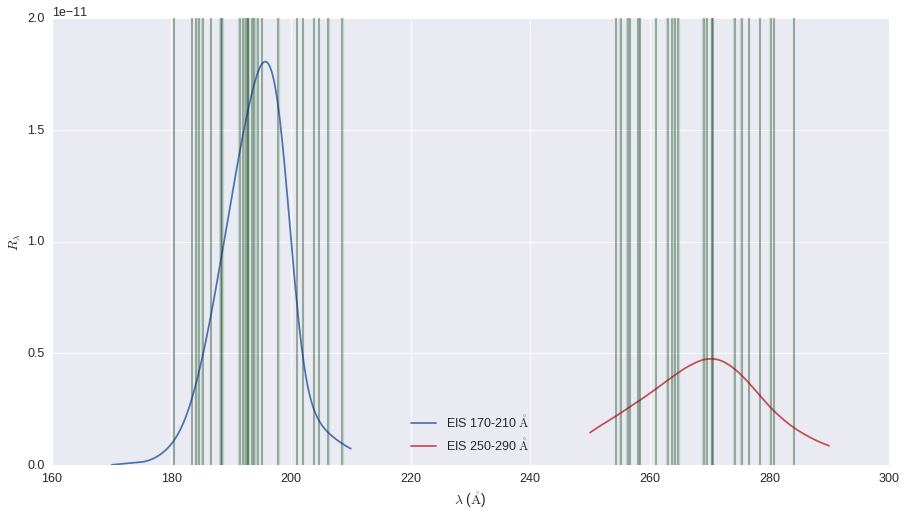

In [90]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
#first response
ax.plot(eis_170_210[:,0],eis_170_210[:,1],
        label=r'EIS 170-210 $\mathrm{\mathring{A}}$',
        color=sns.color_palette('deep')[0])
#second response
ax.plot(eis_250_290[:,0],eis_250_290[:,1],
        label=r'EIS 250-290 $\mathrm{\mathring{A}}$',
        color=sns.color_palette('deep')[2])
#overplot windows
for eis in eis_instr_info:
    delta_lambda = eis['wavelength'][-1]-eis['wavelength'][0]
    ax.axvline(x=eis['transition'],color='k',alpha=0.25)
    ax.axvspan(eis['transition']-delta_lambda/2,eis['transition']+delta_lambda/2,
               color=sns.color_palette('deep')[1],alpha=0.25)
#labels
ax.set_xlabel(r'$\lambda$ ($\mathrm{\mathring{A}}$)')
ax.set_ylabel(r'$R_{\lambda}$')
#ax.set_yscale('log')
ax.legend(loc='best')